# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.397221e+01     1.628769e+01
 * time: 0.0038909912109375
     1     6.404154e+01     1.003431e+01
 * time: 0.011049032211303711
     2     5.878166e+01     1.084421e+01
 * time: 0.027819156646728516
     3     4.252444e+01     9.735248e+00
 * time: 0.05018806457519531
     4     3.289959e+01     8.847334e+00
 * time: 0.07269501686096191
     5     2.826497e+01     7.807760e+00
 * time: 0.09189200401306152
     6     1.418087e+01     2.216868e+00
 * time: 0.10998892784118652
     7     1.252729e+01     4.327398e+00
 * time: 0.1745929718017578
     8     1.097172e+01     2.986539e+00
 * time: 0.19159412384033203
     9     1.020564e+01     3.147881e+00
 * time: 0.20757007598876953
    10     8.506817e+00     2.506141e+00
 * time: 0.22317004203796387
    11     8.066769e+00     4.878614e+00
 * time: 0.23581409454345703
    12     7.708274e+00     4.175119e+00
 * time: 0.24842309951782227
    13     7.089497e+00     2.296589e+00
 * time:

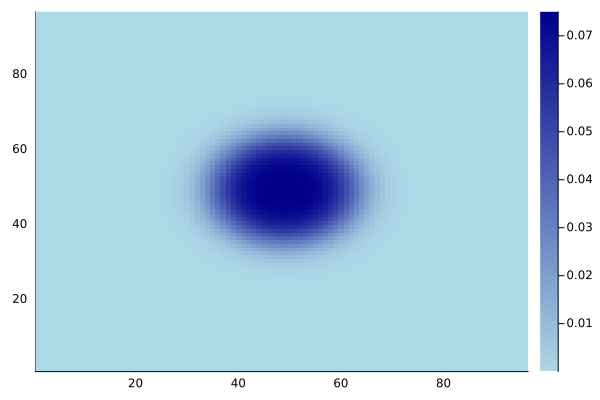

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)